In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
#IMPORT DATA
weather = pd.read_csv("minute_weather.csv")
weather

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587252,1587252,2014-09-10 23:55:29,915.9,74.66,1.0,1.8,11.0,2.1,357.0,1.6,0.0,0.0,46.3
1587253,1587253,2014-09-10 23:56:29,915.9,74.66,9.0,1.6,19.0,1.8,353.0,1.4,0.0,0.0,46.2
1587254,1587254,2014-09-10 23:57:29,915.9,74.66,15.0,1.7,42.0,2.3,353.0,1.2,0.0,0.0,46.3
1587255,1587255,2014-09-10 23:58:29,915.9,74.66,8.0,1.8,24.0,2.2,355.0,1.4,0.0,0.0,46.2


In [17]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587257 entries, 0 to 1587256
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   rowID               1587257 non-null  int64  
 1   hpwren_timestamp    1587257 non-null  object 
 2   air_pressure        1587257 non-null  float64
 3   air_temp            1587257 non-null  float64
 4   avg_wind_direction  1586824 non-null  float64
 5   avg_wind_speed      1586824 non-null  float64
 6   max_wind_direction  1586824 non-null  float64
 7   max_wind_speed      1586824 non-null  float64
 8   min_wind_direction  1586824 non-null  float64
 9   min_wind_speed      1586824 non-null  float64
 10  rain_accumulation   1587256 non-null  float64
 11  rain_duration       1587256 non-null  float64
 12  relative_humidity   1587257 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 157.4+ MB


In [18]:
#DATA SAMPLING
# Karena terlalu banyak row, akan digunakan 2000
#2000-6
weather_sample = weather.sample(n=2000, random_state = 6)
weather_sample.shape

(2000, 13)

In [19]:
weather_sample

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
426486,426486,2012-06-10 01:42:13,911.6,57.74,169.0,3.4,178.0,3.9,160.0,2.5,0.0,0.0,57.3
530321,530321,2012-08-21 04:48:07,915.0,71.06,12.0,1.0,13.0,1.1,10.0,0.9,0.0,0.0,64.9
1549393,1549393,2014-08-15 16:25:32,918.0,80.78,252.0,2.2,291.0,3.3,222.0,1.0,0.0,0.0,41.3
1017205,1017205,2013-07-25 10:00:09,918.1,77.00,340.0,0.3,75.0,0.8,245.0,0.1,0.0,0.0,46.4
581505,581505,2012-09-25 18:10:02,913.7,62.96,192.0,4.4,194.0,4.7,189.0,4.1,0.0,0.0,68.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
770155,770155,2013-02-03 17:29:32,918.2,54.50,7.0,1.8,21.0,2.1,359.0,1.5,0.0,0.0,54.4
1220430,1220430,2013-12-29 22:16:10,921.2,55.58,53.0,6.9,60.0,8.3,43.0,5.5,0.0,0.0,9.1
1548543,1548543,2014-08-15 02:15:32,917.6,73.76,329.0,0.5,341.0,0.7,312.0,0.2,0.0,0.0,49.9
400806,400806,2012-05-23 01:23:11,911.8,64.94,181.0,2.7,186.0,2.9,174.0,2.4,0.0,0.0,32.5


In [20]:
#REMOVING NULLS
rows_before = weather_sample.shape[0]
weather_sample = weather_sample.dropna()
rows_after = weather_sample.shape[0]

In [21]:
rows_before - rows_after

0

In [22]:
#MELAKUKAN EDA (BOXPLOT) DENGAN FILTERING FEATURES
features_1 = ['air_temp','relative_humidity']

In [23]:
features_2 = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']

In [24]:
select_weather1 = weather_sample[features_1]

In [25]:
select_weather2 = weather_sample[features_2]

<AxesSubplot:xlabel='air_temp'>

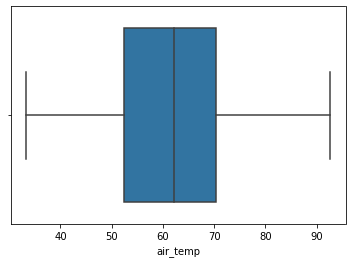

In [26]:
sns.boxplot(data = select_weather1, x = 'air_temp')

<AxesSubplot:xlabel='relative_humidity'>

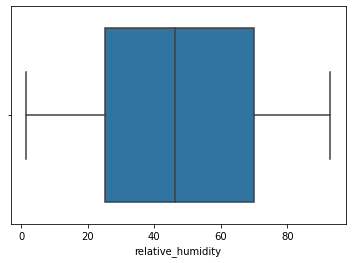

In [27]:
sns.boxplot(data = select_weather1, x = 'relative_humidity')

In [28]:
# MELAKUKAN EDA (HEATMAP) DENGAN SCALING
X1 = StandardScaler().fit_transform(select_weather1)

X2 = StandardScaler().fit_transform(select_weather2)

<AxesSubplot:>

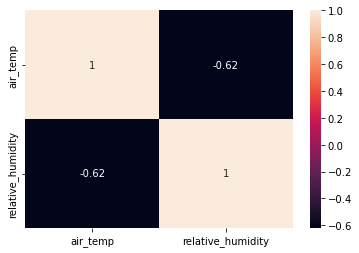

In [29]:
sns.heatmap(select_weather1.corr(), annot=True)

<AxesSubplot:xlabel='air_temp', ylabel='relative_humidity'>

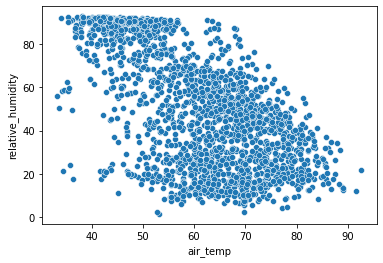

In [30]:
# SCATTERPLOT
sns.scatterplot(data = select_weather1, x = 'air_temp', y='relative_humidity')

<AxesSubplot:>

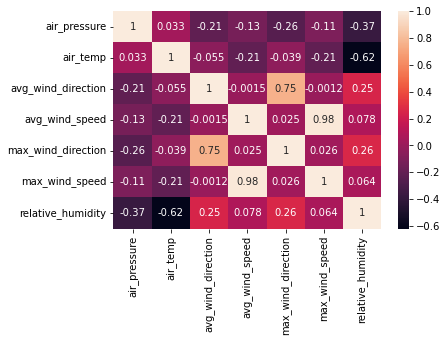

In [31]:
# HEATMAP
sns.heatmap(select_weather2.corr(), annot=True)

In [32]:
# DETERMINING NUMBER OF CLUSTERS (select_weather1)
#Elbow method for number of cluster
sse = []
#Number of clusters that want to be tried
k_rng = range(2,10)

#elbow
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X1)
    sse.append(km.inertia_)

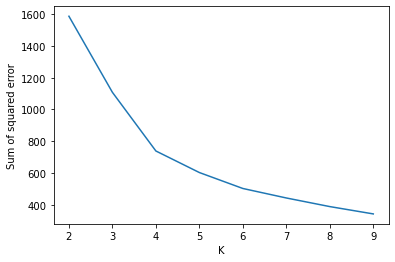

In [33]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

# Elbow is not so Clear

In [34]:
# DETERMINING NUMBER OF CLUSTERS (select_weather2)
#Elbow method for number of cluster
sse = []
#Number of clusters that want to be tried
k_rng = range(2,10)

#elbow
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X2)
    sse.append(km.inertia_)

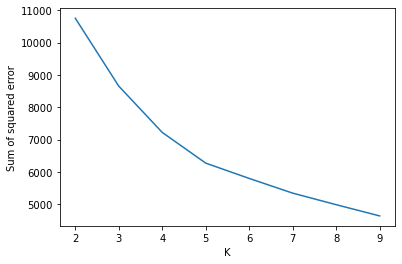

In [35]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

# Elbow is not so Clear

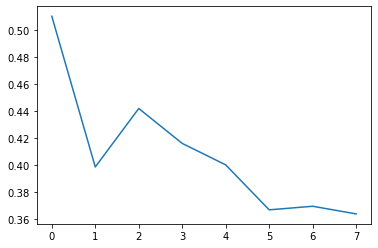

In [36]:
# Determining Number of Clusters: Silhouette Score (#select_weather1)
from sklearn.metrics import silhouette_score
sil = []

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, 10):
  kmeans = KMeans(n_clusters = k, random_state=0).fit(X1)
  labels = kmeans.labels_
  sil.append(silhouette_score(X1, labels, metric = 'euclidean'))   

plt.plot(sil)

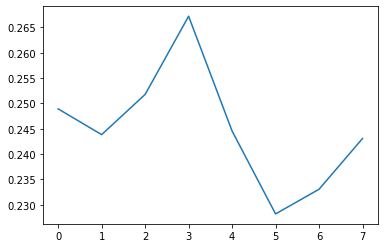

In [37]:
# Determining Number of Clusters: Silhouette Score (#select_weather2)

from sklearn.metrics import silhouette_score

sil = []

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, 10):
  kmeans = KMeans(n_clusters = k, random_state=0)
  kmeans.fit(X2)
  labels = kmeans.labels_
  sil.append(silhouette_score(X2, labels, metric = 'euclidean'))   

plt.plot(sil)

In [38]:
# MODELING
kmeans1 = KMeans(n_clusters= 2, random_state = 0)
kmeans2 = KMeans(n_clusters= 3, random_state = 0)
label1 = kmeans1.fit_predict(X1)
label2 = kmeans2.fit_predict(X2)

In [39]:
#Checking Silhouette Score
score = silhouette_score(X1, kmeans1.labels_, metric='euclidean')
#
# Print the score
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.510


In [40]:
score = silhouette_score(X2, kmeans2.labels_, metric='euclidean')
#
# Print the score
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.244


In [41]:
#CLUSTER CENTERS
centers1 = kmeans1.fit(X1).cluster_centers_
centers1

array([[-0.95498442,  1.02166808],
       [ 0.5890486 , -0.63018007]])

In [42]:
centers2 = kmeans2.fit(X2).cluster_centers_
centers2

array([[-0.47640352, -0.63020287,  0.1230653 ,  1.58682153,  0.19554716,
         1.55252952,  0.45416497],
       [ 0.4427254 ,  0.19090225, -1.20308896, -0.40446987, -1.0909771 ,
        -0.40052168, -0.43305059],
       [-0.08061487,  0.1269398 ,  0.66503962, -0.36472504,  0.57110952,
        -0.35400729,  0.0833557 ]])

In [43]:
select_weather1['Weather Type'] = label1

select_weather2['Weather Type'] = label2

In [44]:
# VISUALIZATION
def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('Weather Type')

	
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['Weather Type'] = P['Weather Type'].astype(int)
	return P

In [45]:
from pandas.plotting import parallel_coordinates
from itertools import cycle, islice
from cycler import cycler
def parallel_plot(data):
    my_colors = list(islice(cycle(['red', 'brown', 'yellow', 'olive', 
                                   'lime','cyan','blue', 'dimgray',
                                  'indigo', 'violet','pink', 'black']), None, len(data)))
    plt.figure(figsize=(10,10)).gca().axes.set_ylim([-3,+3])
    parallel_coordinates(data, 'Weather Type',color = my_colors, marker = 'o')

In [46]:
P1 = pd_centers(features_1, centers1)
P1

,air_temp,relative_humidity,Weather Type
0,-0.954984,1.021668,0
1,0.589049,-0.630180,1


In [47]:
P2 = pd_centers(features_2, centers2)
P2

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,Weather Type
0,-0.476404,-0.630203,0.123065,1.586822,0.195547,1.552530,0.454165,0
1,0.442725,0.190902,-1.203089,-0.404470,-1.090977,-0.400522,-0.433051,1
2,-0.080615,0.126940,0.665040,-0.364725,0.571110,-0.354007,0.083356,2


In [48]:
p1 = select_weather1[select_weather1['Weather Type'] == 0]
p2 = select_weather1[select_weather1['Weather Type'] == 1]

Text(0, 0.5, 'Air Temperature')

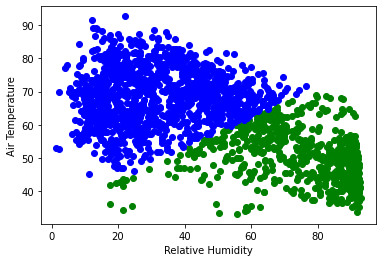

In [49]:
plt.scatter(p1['relative_humidity'],p1['air_temp'], c='green')
plt.scatter(p2['relative_humidity'],p2['air_temp'], c='blue')
plt.xlabel('Relative Humidity')
plt.ylabel('Air Temperature')

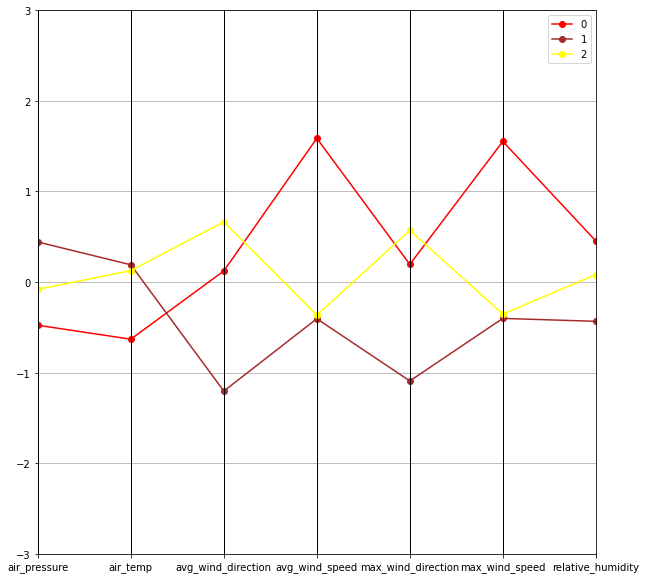

In [50]:
parallel_plot(P2)

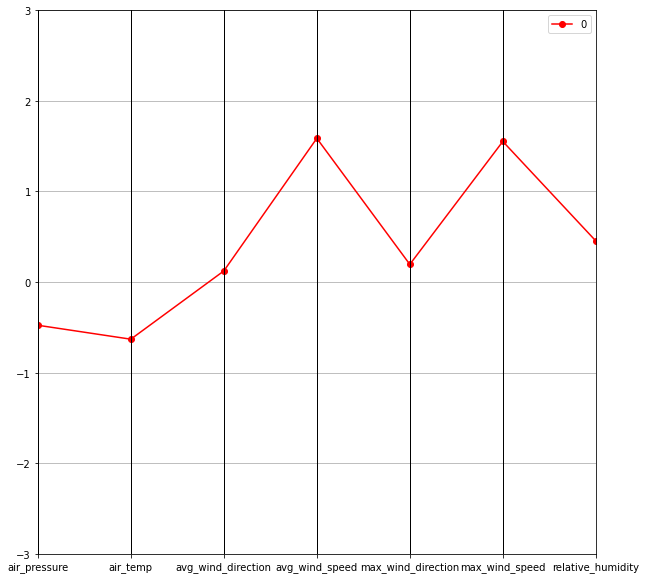

In [51]:
# WINDY WEATHER
parallel_plot(P2[P2['avg_wind_speed'] > 0.3])

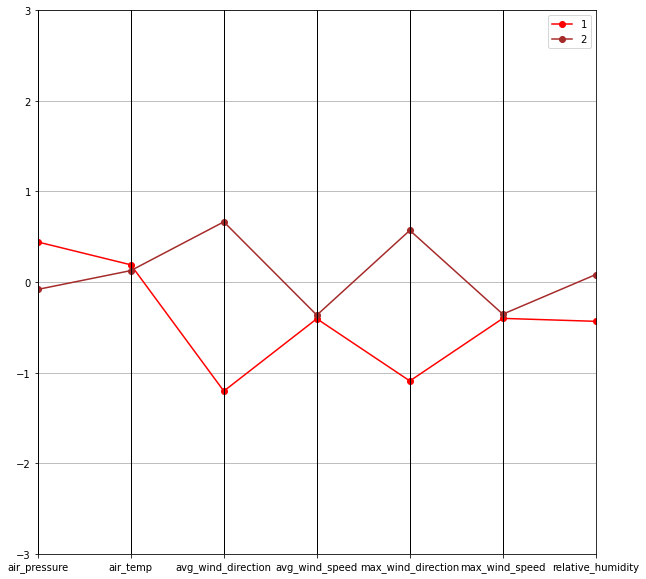

In [52]:
#WARM WEATHER
parallel_plot(P2[(P2['air_temp'] > -0.2) & (P2['air_temp'] < 0.2)])

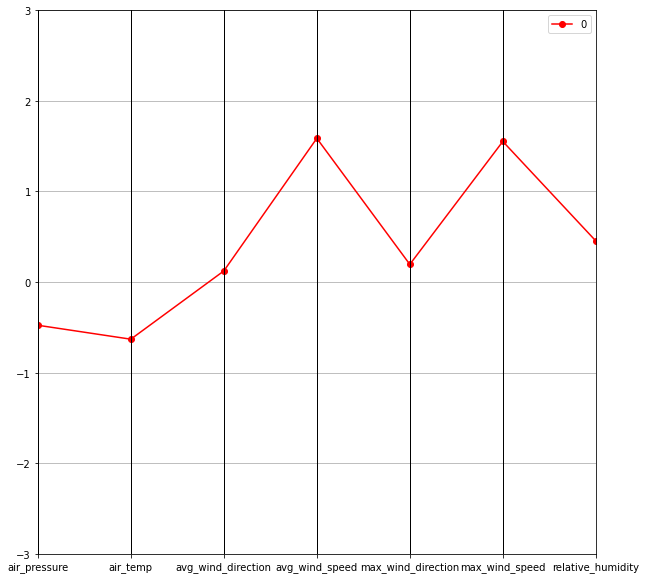

In [53]:
#COLD DAYS
parallel_plot(P2[P2['air_temp'] < -0.4])

In [54]:
# MODEL WITH 12 CLUSTERS
kmeans3 = KMeans(n_clusters=12, random_state = 0)
label3 = kmeans3.fit_predict(X2)

In [55]:
centers3 = kmeans3.fit(X2).cluster_centers_
centers3

array([[ 0.03039607,  0.97921162,  1.34520957, -0.63524686,  1.59533747,
        -0.57539284, -0.67103718],
       [-0.20652155,  0.67596314,  0.42512883,  0.6637654 ,  0.50431577,
         0.59904471, -0.19084216],
       [-0.76500123, -0.96162965,  0.45409229,  1.33199752,  0.52635459,
         1.27027535,  1.03037204],
       [ 1.3154529 ,  0.11537592, -1.23250743, -0.34075961, -1.09146933,
        -0.31844317, -0.98828042],
       [-0.24904373,  0.60638524,  0.21466824, -0.59349361,  0.35953216,
        -0.60503662, -0.44058556],
       [ 1.15569224, -0.230926  , -1.15367067,  1.8955677 , -1.06656659,
         2.0336412 , -1.20177613],
       [ 1.02522951, -0.83656509,  0.98817305, -0.48326375,  1.17470132,
        -0.43239149,  0.51320372],
       [-0.31513086,  0.8689866 , -1.2760649 , -0.61791115, -1.15499513,
        -0.64402095, -0.60908341],
       [-1.77179981, -1.31368046,  0.39680592,  2.99765824,  0.44388664,
         2.98675834,  1.31396319],
       [-0.61893473, -1.0325

In [56]:
P3 = pd_centers(features_2, centers3)
P3

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,Weather Type
0,0.030396,0.979212,1.345210,-0.635247,1.595337,-0.575393,-0.671037,0
1,-0.206522,0.675963,0.425129,0.663765,0.504316,0.599045,-0.190842,1
2,-0.765001,-0.961630,0.454092,1.331998,0.526355,1.270275,1.030372,2
3,1.315453,0.115376,-1.232507,-0.340760,-1.091469,-0.318443,-0.988280,3
4,-0.249044,0.606385,0.214668,-0.593494,0.359532,-0.605037,-0.440586,4
5,1.155692,-0.230926,-1.153671,1.895568,-1.066567,2.033641,-1.201776,5
6,1.025230,-0.836565,0.988173,-0.483264,1.174701,-0.432391,0.513204,6
7,-0.315131,0.868987,-1.276065,-0.617911,-1.154995,-0.644021,-0.609083,7
8,-1.771800,-1.313680,0.396806,2.997658,0.443887,2.986758,1.313963,8
9,-0.618935,-1.032571,0.421269,-0.355262,0.521462,-0.351477,1.279425,9


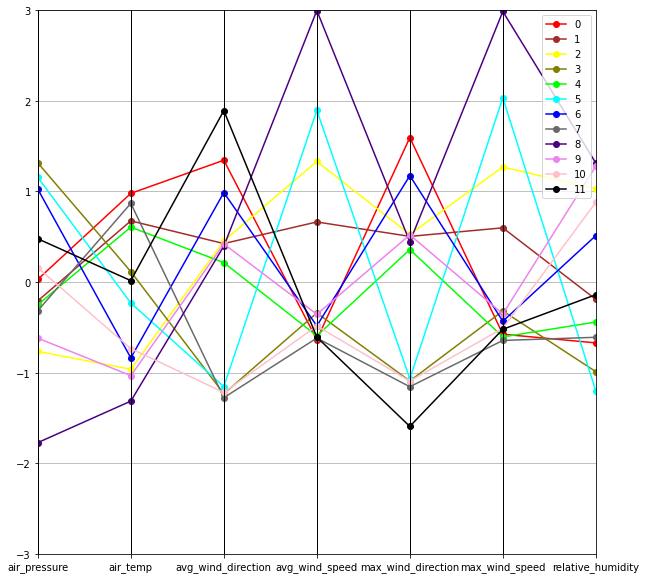

In [57]:
parallel_plot(P3)

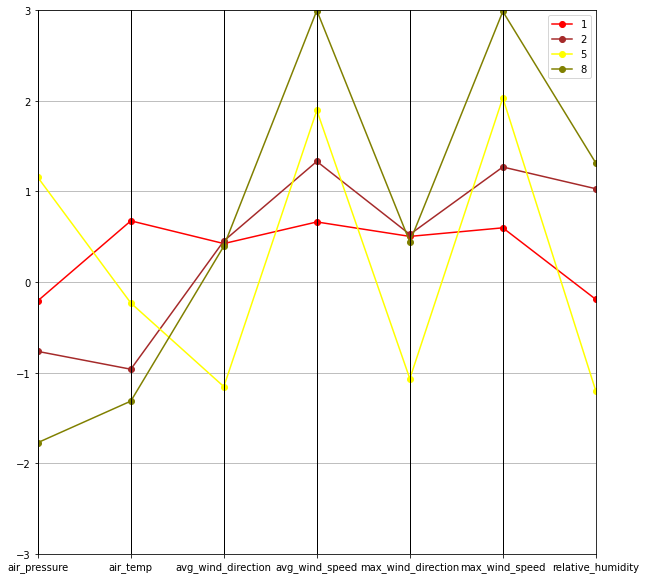

In [58]:
# Windy Days
parallel_plot(P3[P3['avg_wind_speed'] > 0.3])

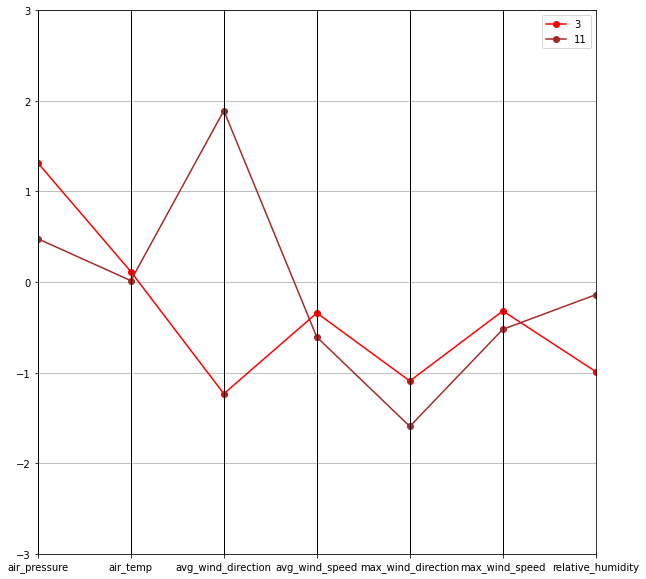

In [59]:
# Warm Weather
parallel_plot(P3[(P3['air_temp'] > -0.2) & (P3['air_temp'] < 0.2)])

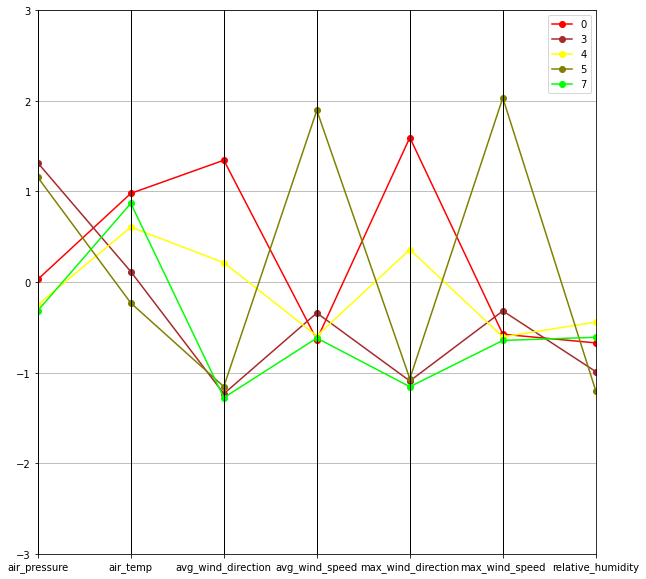

In [60]:
# Dry Weather
parallel_plot(P3[P3['relative_humidity'] < -0.4])

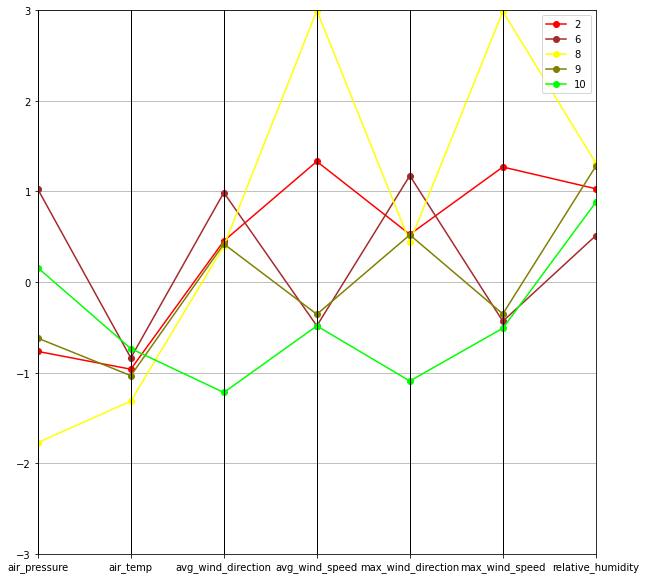

In [61]:
# Cold Weather
parallel_plot(P3[P3['air_temp'] < -0.4])

In [62]:
## Untuk pengerjaan Preprocessing, Modeling, Model Evaluation ada di dalam file K-MEANS(2)

In [63]:
## DBSCAN

In [64]:
from sklearn.cluster import DBSCAN
dbscan_1 = DBSCAN(eps=0.15, min_samples=60).fit(X1)
clusters_labels = dbscan_1.labels_
select_weather1['Weather_Type_DB'] = dbscan_1.labels_

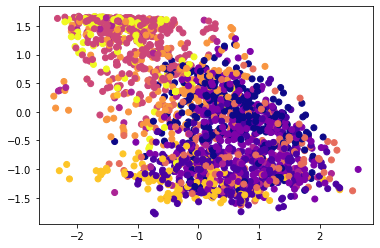

In [68]:
plt.scatter(X1[:, 0], X1[:,1], c = labels, cmap= "plasma") 
plt.show() # showing the plot

In [73]:
dbscan_2 = DBSCAN(eps=0.15, min_samples=60).fit(X2)
clusters_labels = dbscan_2.labels_
select_weather2['Weather_Type_DB'] = dbscan_2.labels_

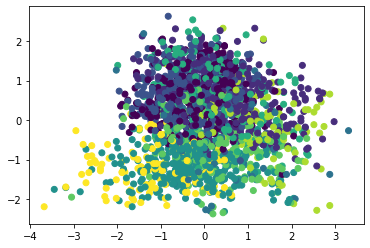

In [75]:
plt.scatter(X2[:, 0], X2[:,1], c = labels) 
plt.show() # showing the plot